In [30]:
from tensorflow.keras.datasets import fashion_mnist

In [31]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [41]:
x_train.shape

(60000, 28, 28, 1)

In [42]:
y_train.shape

(60000,)

In [38]:
x_train.max()

1.0

In [39]:
x_train.min()

0.0

In [36]:
x_train = x_train/255 

In [37]:
x_test = x_test/255

In [40]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [43]:
import matplotlib.pyplot as plt

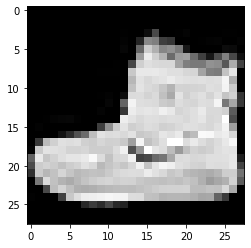

In [44]:
plt.imshow(x_train[0],cmap='gray')

In [49]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
y_train = to_categorical(y_train, 10)

In [48]:
y_test = to_categorical(y_test, 10) 

In [50]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
#Initialization of Model
model = Sequential()

In [53]:
#FORMATION OF MODEL
#Formation of CNN 
#BLOCK:1 
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK:2
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [54]:
#Compilation of Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
#summary of model->whole details of model
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          32800     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [56]:
#Training of Model  
model.fit(x_train,y_train,verbose=1,epochs=10)  

Epoch 1/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.4778 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3177 - accuracy: 0.8820
Epoch 3/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2726 - accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2403 - accuracy: 0.9100
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2156 - accuracy: 0.9196
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1954 - accuracy: 0.9266
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1763 - accuracy: 0.9332
Epoch 8/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1598 - accuracy: 0.9399
Epoch 9/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1450 - accuracy: 0.9449
Epoch 10/10
1875/1875 [==============================] - 76s 40m

In [57]:
#evaluation of model
model.evaluate(x_test,y_test)  

313/313 [==============================] - 6s 19ms/step - loss: 0.3353 - accuracy: 0.8986


[0.3352757394313812, 0.8985999822616577]

In [58]:
#GENERATION OF MODEL CLASSIFICATION REPORT 
import sklearn
from sklearn.metrics import classification_report

In [59]:
prediction = model.predict_classes(x_test) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


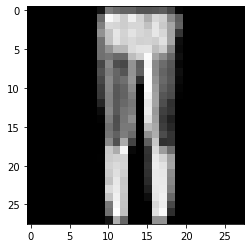

In [61]:
plt.imshow(x_test[3], cmap='gray')

In [62]:
y_test[3] 

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [63]:
prediction[3]

1

In [64]:
model.metrics_names

['loss', 'accuracy']

In [65]:
import numpy as np

In [66]:
y_test = np.argmax(y_test, axis=1)

In [68]:
y_test[3]

1

In [69]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.76      0.90      0.83      1000
           3       0.90      0.93      0.92      1000
           4       0.92      0.72      0.80      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.66      0.71      1000
           7       0.96      0.96      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

